In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scvi
from statsmodels.stats import weightstats as stests
plt.rcParams['axes.grid'] = False
from matplotlib import rcParams
mpl.rcParams['pdf.fonttype'] = 42

Global seed set to 0


In [2]:
adata = scvi.data.read_h5ad("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_250522_JE2_timecourse/merged_exp/onlymRNA_scVI_exp_timecourse_merged_seed123.h5ad")
adata

AnnData object with n_obs × n_vars = 385196 × 2284
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'sample', 'n_counts', '_scvi_batch', '_scvi_labels', 'leiden_scVI', '_scvi_raw_norm_scaling', 'OD', 'cluster', 'batch'
    var: 'n_cells_by_counts-adata1', 'mean_counts-adata1', 'log1p_mean_counts-adata1', 'pct_dropout_by_counts-adata1', 'total_counts-adata1', 'log1p_total_counts-adata1', 'n_counts-adata1', 'n_cells_by_counts-adata1-adata2', 'mean_counts-adata1-adata2', 'log1p_mean_counts-adata1-adata2', 'pct_dropout_by_counts-adata1-adata2', 'total_counts-adata1-adata2', 'log1p_total_counts-adata1-adata2', 'n_counts-adata1-adata2', 'n_cells_by_counts-adata2-adata2', 'mean_counts-adata2-adata2', 'log1p_mean_counts-adata2-adata2', 'pct_dropout_by_counts-adata2-adata2', 'total_counts-adata2-adata2', 'log1p_total_counts-adat

In [3]:
adata.obs['sample'].value_counts()

JE2_0.3    74937
JE2_0.1    74661
4r_0.1     66574
4r_0.9     37217
4r_0.2     36563
JE2_0.9    34008
4r_0.6     30860
4r_0.3     30376
Name: sample, dtype: int64

In [4]:
adata.obs['sample'] = adata.obs['sample'].str.replace('JE2', '0r', regex=False)
adata.obs['sample'].value_counts()

0r_0.3    74937
0r_0.1    74661
4r_0.1    66574
4r_0.9    37217
4r_0.2    36563
0r_0.9    34008
4r_0.6    30860
4r_0.3    30376
Name: sample, dtype: int64

In [5]:
adata = adata[adata.obs['sample'] != '4r_0.2', :].copy()
adata.obs['sample'].value_counts()

0r_0.3    74937
0r_0.1    74661
4r_0.1    66574
4r_0.9    37217
0r_0.9    34008
4r_0.6    30860
4r_0.3    30376
Name: sample, dtype: int64

In [5]:
adata = adata[adata.obs['sample'] != '4r_0.6', :].copy()
adata.obs['sample'].value_counts()

0r_0.3    74937
0r_0.1    74661
4r_0.1    66574
4r_0.9    37217
0r_0.9    34008
4r_0.3    30376
Name: sample, dtype: int64

In [6]:
sc.pp.calculate_qc_metrics(adata)

(                                            n_genes_by_counts  \
 Cell Barcode                                                    
 BS29198A_bc1_10_bc2_10_bc3_31-adata1                       35   
 BS29198A_bc1_10_bc2_10_bc3_38-adata1                       15   
 BS29198A_bc1_10_bc2_10_bc3_78-adata1                       55   
 BS29198A_bc1_10_bc2_10_bc3_84-adata1                       16   
 BS29198A_bc1_10_bc2_10_bc3_91-adata1                       10   
 ...                                                       ...   
 BS27884A_bc1_9_bc2_96_bc3_75-adata2-adata2                 78   
 BS27884A_bc1_9_bc2_9_bc3_22-adata2-adata2                  58   
 BS27884A_bc1_9_bc2_9_bc3_32-adata2-adata2                  90   
 BS27884A_bc1_9_bc2_9_bc3_44-adata2-adata2                 182   
 BS27884A_bc1_9_bc2_9_bc3_47-adata2-adata2                  20   
 
                                             log1p_n_genes_by_counts  \
 Cell Barcode                                                       

In [3]:
scvi.settings.seed = 123

Global seed set to 123


In [ ]:
adata.raw = adata # Freeze current version

scvi.data.setup_anndata(adata)

model = scvi.model.SCVI(adata,
                        n_layers=2,
                        n_latent=5,
                        n_hidden=64,
                        dropout_rate=0.1,
                        gene_likelihood='zinb',
                        dispersion='gene'
                       )
model.train()

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 317773 cells, 2284 vars, 1        
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/Users/peien/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function setup_anndata is deprecated; Please use the model-specific setup_anndata methods instead. The global method will be removed in version 0.15.0.
  warnings.warn(msg, category=FutureWarning)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Epoch 25/25: 100%|██████████| 25/25 [37:38<00:00, 90.33s/it, loss=168, v_num=1]


In [ ]:
adata.obsm["X_scVI"] = model.get_latent_representation()

In [ ]:
adata.layers["scvi_normalized"] = model.get_normalized_expression(
    library_size=10e4
)

In [ ]:
sc.pp.neighbors(adata, use_rep='X_scVI')
sc.tl.umap(adata)

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/umap/distances.py:1086: NumbaDepr

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


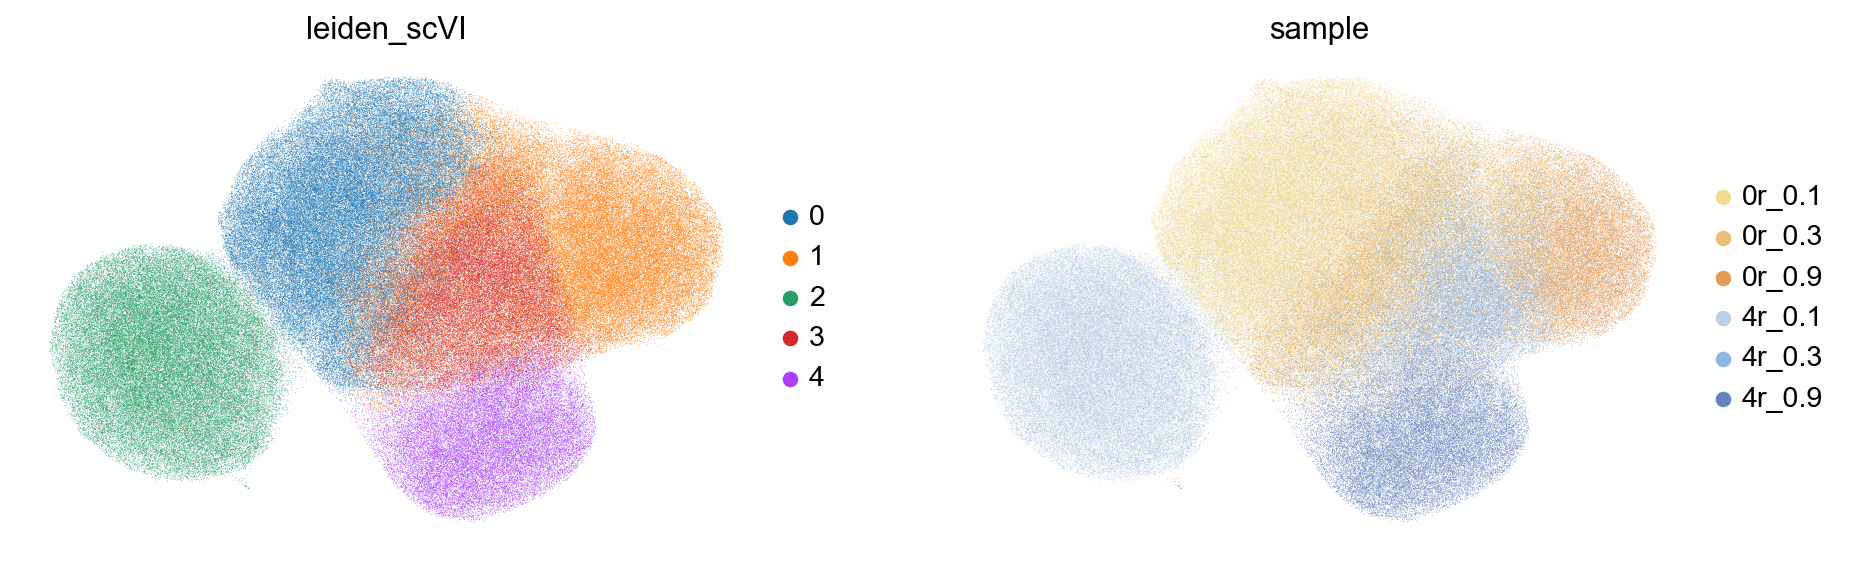

In [56]:
sc.set_figure_params(figsize=(6, 4))
sc.pl.umap(
    adata,
    color=["leiden_scVI","sample"],
    frameon=False,
    save="leiden_scVI_sample_0r4r139_seed123.pdf"
)

In [171]:
mapping = {0: 'S', 2: 'S',
           1: 'L', 3: 'L',
           4: 'M'}

adata.obs['Cluster'] = (
    adata.obs['leiden_scVI']
    .astype(int)           # ensure integer dtype
    .map(mapping)
)

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


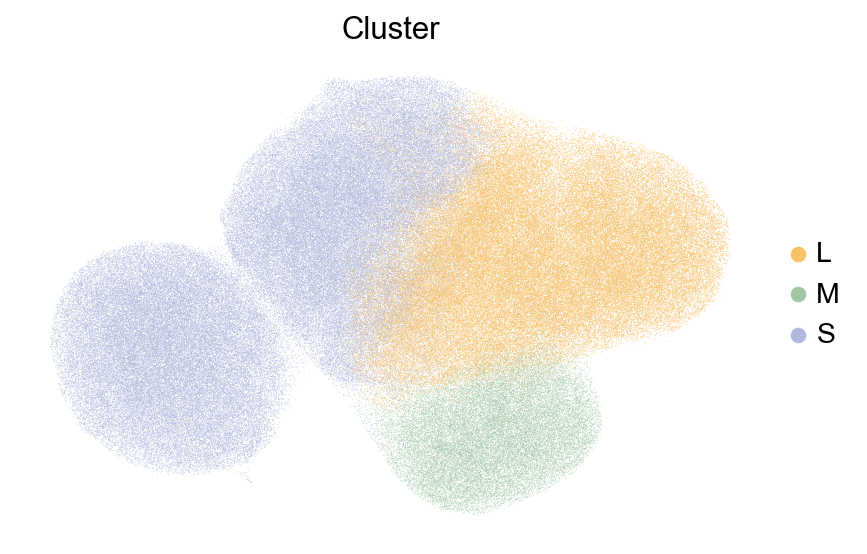

In [174]:
sc.set_figure_params(figsize=(6, 4))
sc.pl.umap(
    adata,
    color=["Cluster"],
    frameon=False,
    palette=[ '#F7C167','#A2C7A7','#B1B8DD'],    
    save="Cluster_0r4r139_seed123.pdf"
)

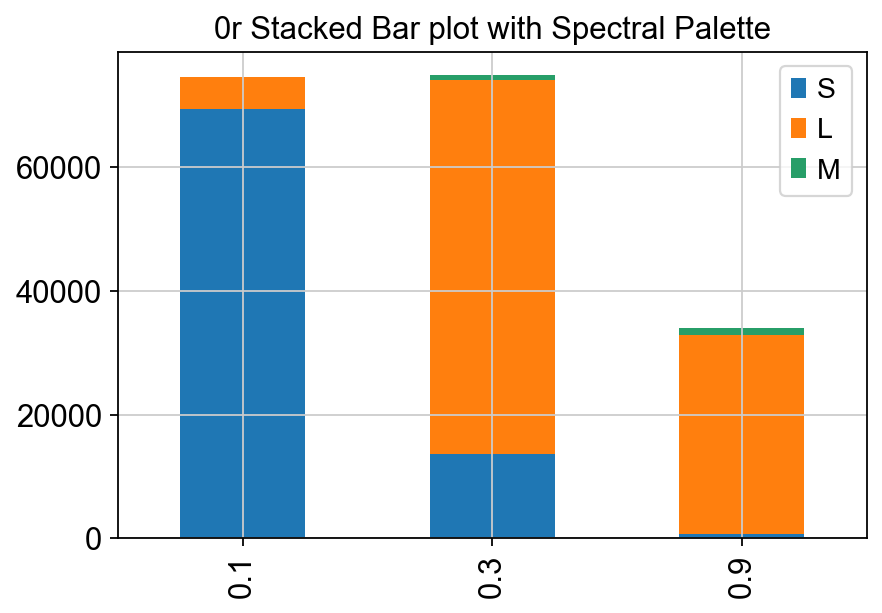

In [177]:
sample1 = adata.obs.loc[adata.obs['sample']=='0r_0.1', :]['Cluster'].value_counts()
sample2 = adata.obs.loc[adata.obs['sample']=='0r_0.3', :]['Cluster'].value_counts()
sample3 = adata.obs.loc[adata.obs['sample']=='0r_0.9', :]['Cluster'].value_counts()
df_plot = pd.DataFrame([sample1, sample2,sample3])
df_plot.index=['0.1','0.3','0.9']
df_plot.plot(kind='bar',stacked=True, title='0r Stacked Bar plot with Spectral Palette');

<Figure size 320x336 with 0 Axes>

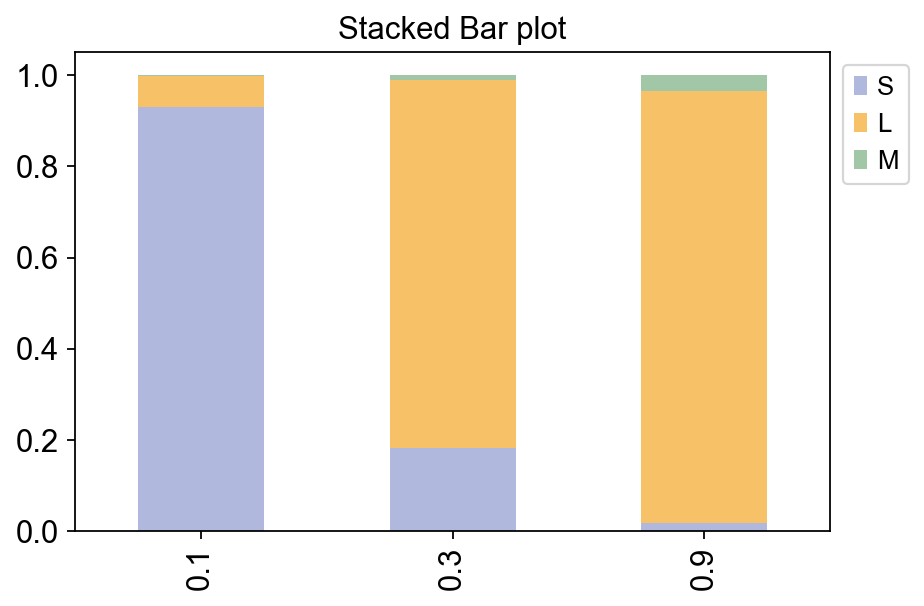

In [180]:
plt.figure(figsize=(4,4.2))
ax = df_plot.div(df_plot.sum(axis=1),axis=0).plot(
    kind='bar',stacked=True, 
    color=[ '#B1B8DD', '#F7C167', '#A2C7A7'], 
    title='Stacked Bar plot')
# Remove gridlines
ax.grid(False)
plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize="small")
plt.tight_layout()
plt.savefig("0r_stacked_cluster_final.pdf")

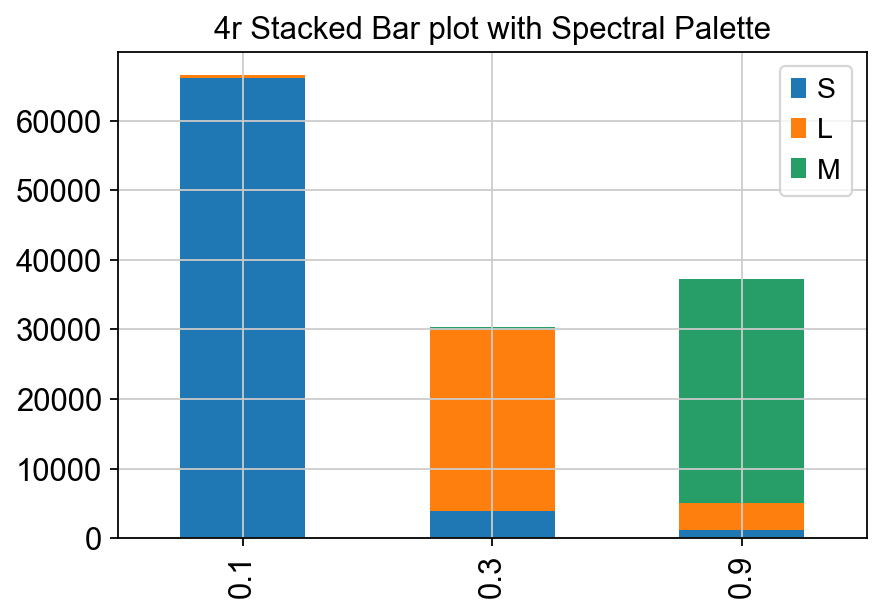

In [181]:
sample1 = adata.obs.loc[adata.obs['sample']=='4r_0.1', :]['Cluster'].value_counts()
sample2 = adata.obs.loc[adata.obs['sample']=='4r_0.3', :]['Cluster'].value_counts()
sample3 = adata.obs.loc[adata.obs['sample']=='4r_0.9', :]['Cluster'].value_counts()
df_plot = pd.DataFrame([sample1, sample2,sample3])
df_plot.index=['0.1','0.3','0.9']
df_plot.plot(kind='bar',stacked=True, title='4r Stacked Bar plot with Spectral Palette');

<Figure size 320x336 with 0 Axes>

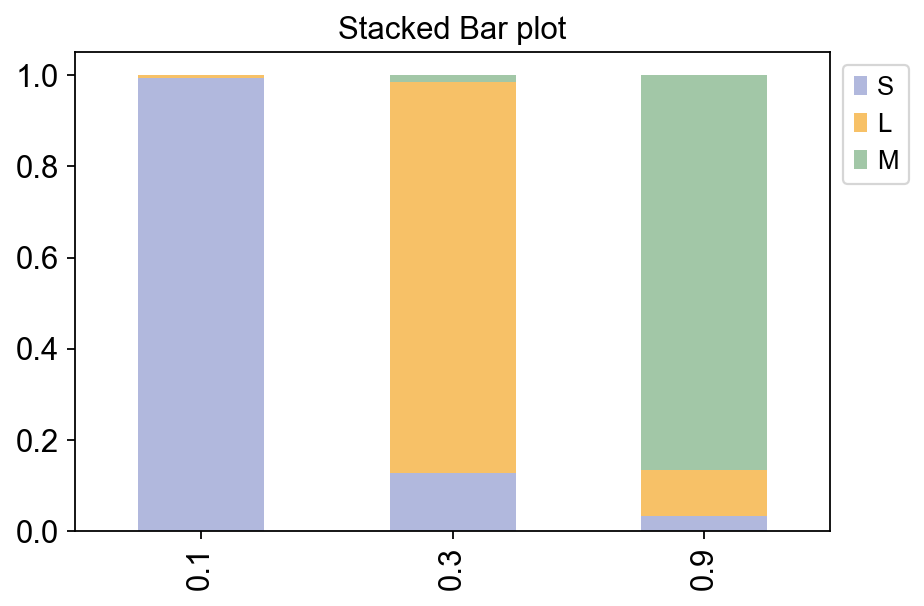

In [182]:
plt.figure(figsize=(4,4.2))
ax = df_plot.div(df_plot.sum(axis=1),axis=0).plot(
    kind='bar',stacked=True, 
    color=[ '#B1B8DD', '#F7C167', '#A2C7A7'], 
    title='Stacked Bar plot')
# Remove gridlines
ax.grid(False)
plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize="small")
plt.tight_layout()
plt.savefig("4r_stacked_cluster_final.pdf")

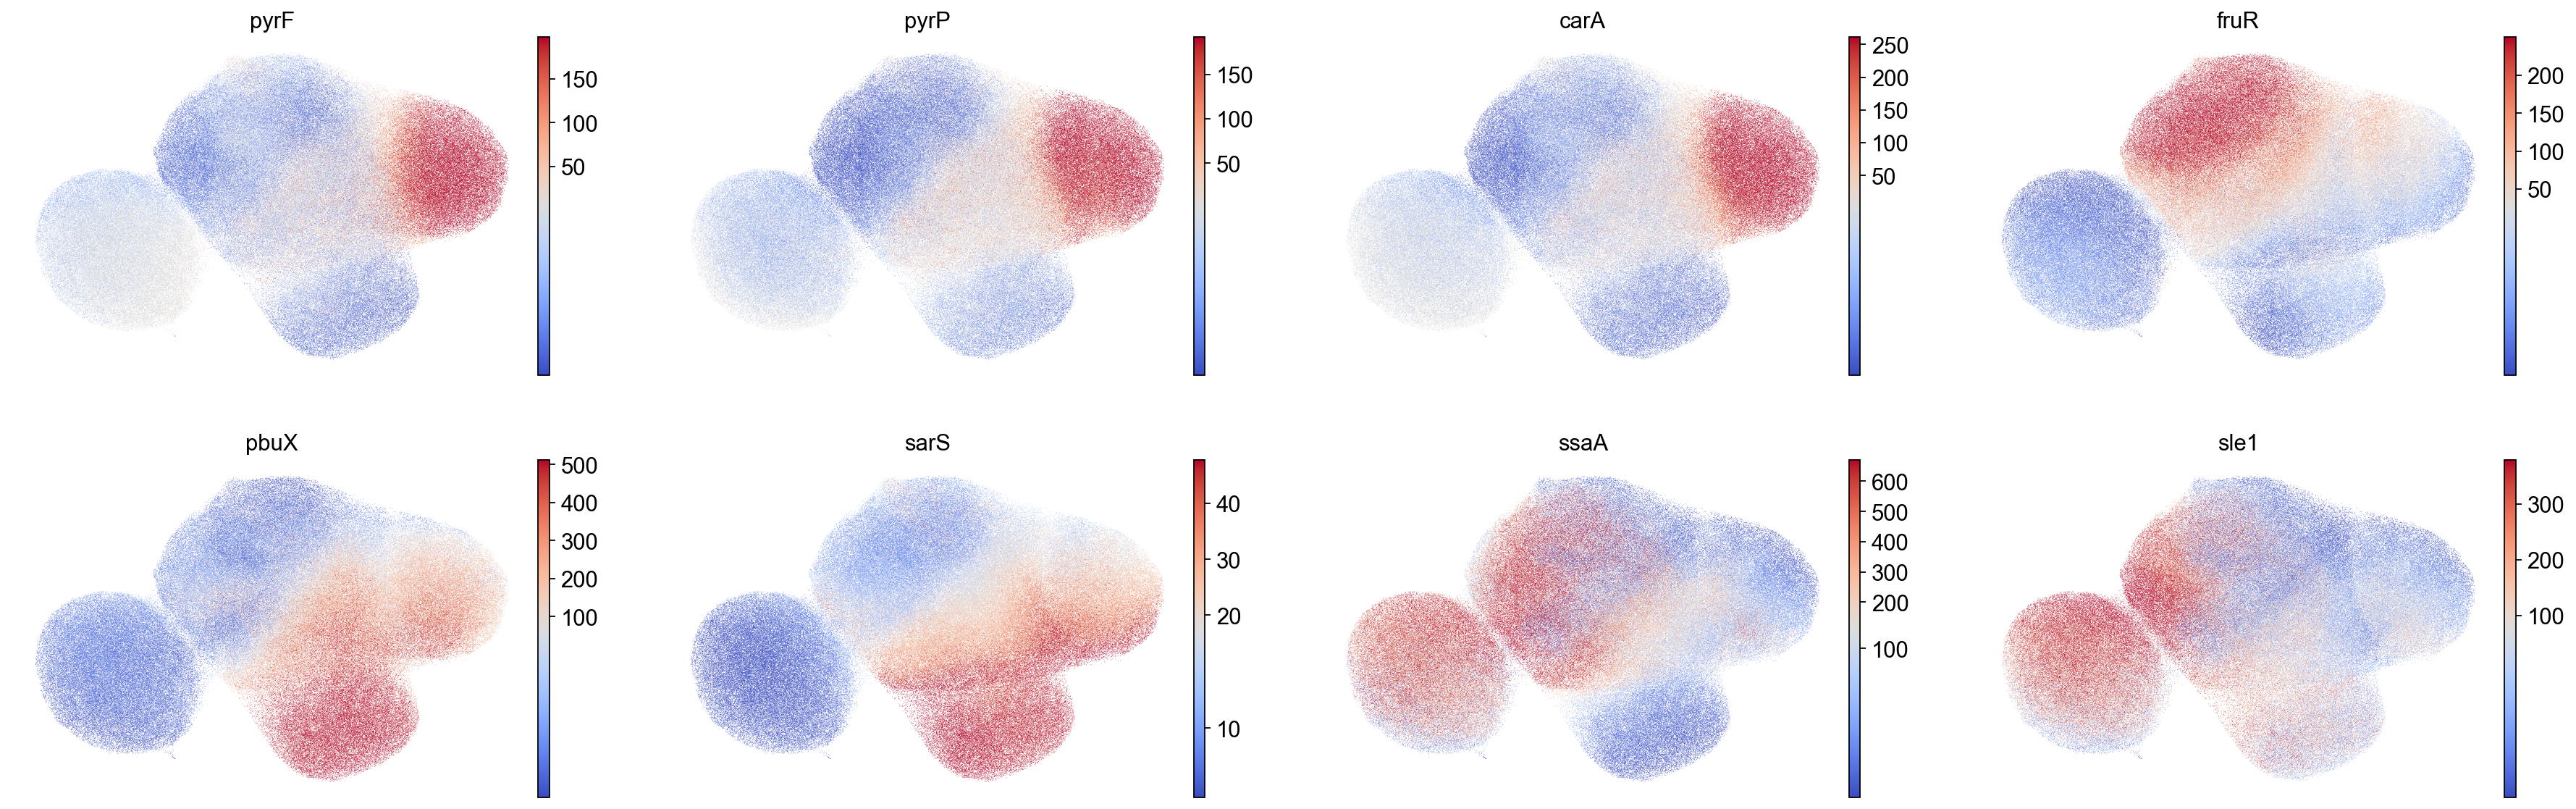

In [ ]:
sc.set_figure_params(figsize=(6, 4))
sc.pl.umap(
    adata,
    color=["pyrF","pyrP","carA","fruR","pbuX","sarS","ssaA","sle1"],
    frameon=False,
    layer="scvi_normalized",
    cmap="coolwarm",
    vmax='p90',
    vcenter='p50',
    vmin='p10',
    save="markers_0r4r139_seed123.pdf"
)

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


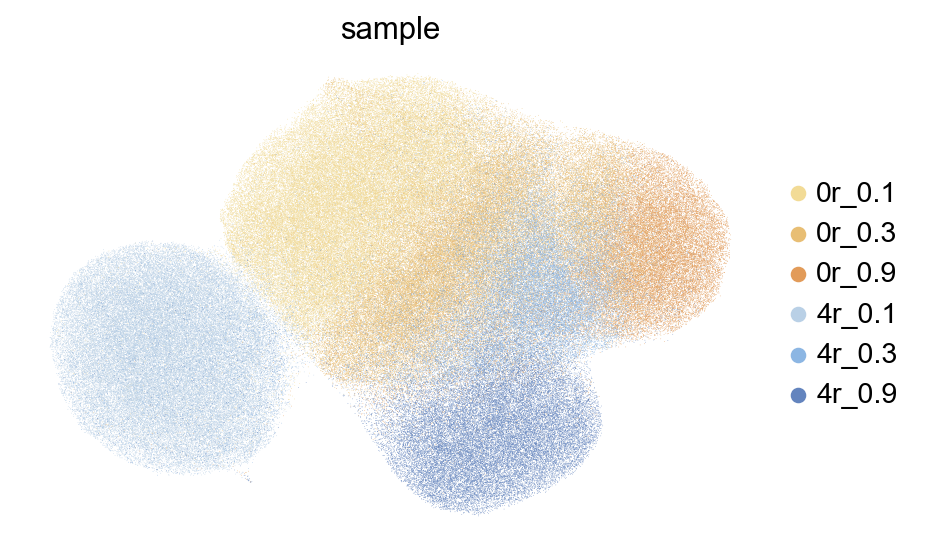

In [ ]:
sc.set_figure_params(figsize=(6, 4))
sc.pl.umap(
    adata,
    color=["sample"],
    frameon=False,
    #palette = ["#D7EAEC", '#BBD5D4', '#83B5B5', '#BFC5D5','#C8B8D4', '#9897BC'],
    #palette = ['#F5DDB7','#F5C9BC', '#B19CCB', '#CBD9EB', '#8FBEDC', '#3681AB'],
    palette=['#F2DB96', '#E8BE74', "#E29B59", "#B9D0E6", "#8CB6E3", "#6384be"],
    save="sample_0r4r139_seed123.pdf"
)

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


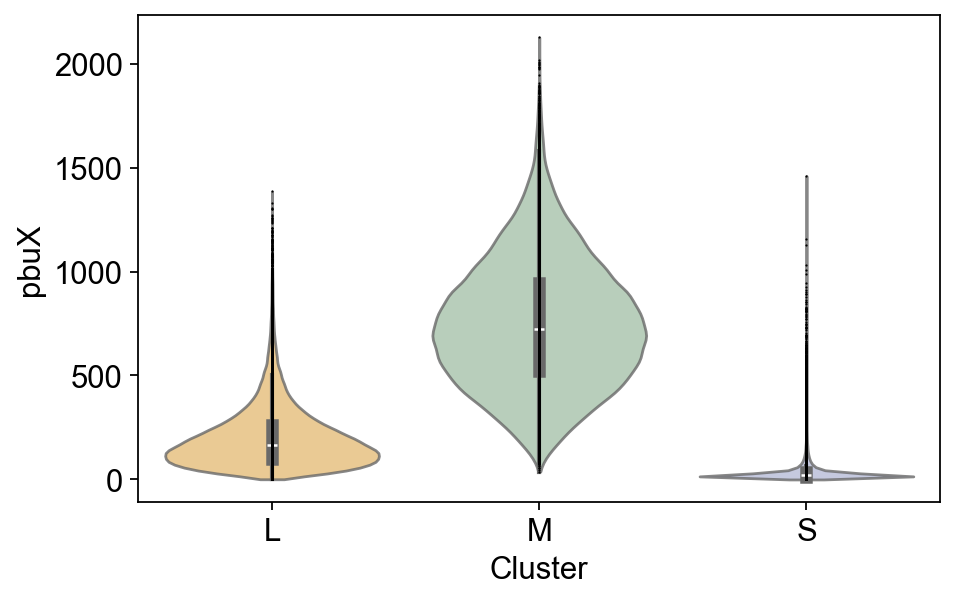

In [184]:
plt.rcParams['axes.grid'] = False
sc.pl.violin(adata, keys='pbuX', groupby='Cluster',use_raw=False,layer="scvi_normalized", jitter=False, 
             inner="box",
             alpha=0.8,
             save="pbuX_Cluster.pdf")

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


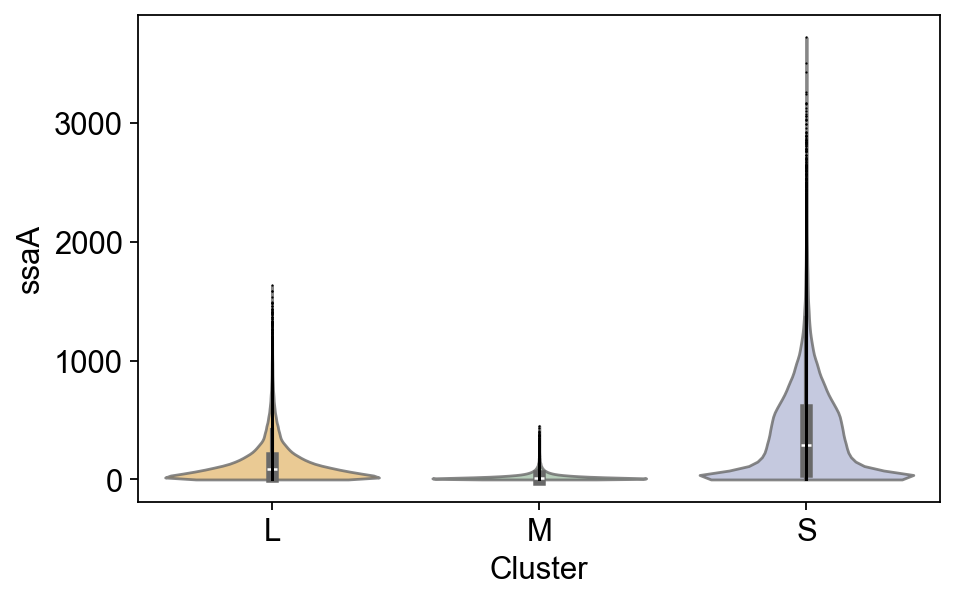

In [185]:
plt.rcParams['axes.grid'] = False
sc.pl.violin(adata, keys='ssaA', groupby='Cluster',use_raw=False,layer="scvi_normalized", jitter=False, 
             inner="box",
             alpha=0.8,
             save="ssaA_Cluster.pdf")

In [190]:
adata.write_h5ad("onlymRNA_scVI_0r4r139_seed123.h5ad")

In [ ]:
model.save('onlymRNA_scVI_0r4r139_seed123')

In [85]:
model = scvi.model.SCVI.load('/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_250522_JE2_timecourse/merged0r4r_139/onlymRNA_scVI_0r4r139_seed123', adata)

INFO     Using data from adata.X                                                             
INFO     Registered keys:['X', 'batch_indices', 'labels']                                    
INFO     Successfully registered anndata object containing 317773 cells, 2284 vars, 1        
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  


/Users/peien/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function transfer_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


In [6]:
adata.obs['OD'] = adata.obs['sample'].str.split('_').str[1]
adata.obs['OD'] = adata.obs['OD'].astype(float)
adata.obs['condition'] = adata.obs['sample'].str.split('_').str[0]
adata.obs

n_genes_by_counts  \
Cell Barcode                                                    
BS29198A_bc1_10_bc2_10_bc3_31-adata1                       35   
BS29198A_bc1_10_bc2_10_bc3_38-adata1                       15   
BS29198A_bc1_10_bc2_10_bc3_78-adata1                       55   
BS29198A_bc1_10_bc2_10_bc3_84-adata1                       16   
BS29198A_bc1_10_bc2_10_bc3_91-adata1                       10   
...                                                       ...   
BS27884A_bc1_9_bc2_96_bc3_75-adata2-adata2                 78   
BS27884A_bc1_9_bc2_9_bc3_22-adata2-adata2                  59   
BS27884A_bc1_9_bc2_9_bc3_32-adata2-adata2                  90   
BS27884A_bc1_9_bc2_9_bc3_44-adata2-adata2                 183   
BS27884A_bc1_9_bc2_9_bc3_47-adata2-adata2                  21   

                                            log1p_n_genes_by_counts  \
Cell Barcode                                                          
BS29198A_bc1_10_bc2_10_bc3_31-adata1                       3.583519   
BS29198A_bc1_10_bc2_10_bc3_38-adata1                       2.772589   
BS29198A_bc1_10_bc2_10_bc3_78-adata1                       4.025352   
BS29198A_bc1_10_bc2_10_bc3_84-adata1                       2.833213   
BS29198A_bc1_10_bc2_10_bc3_91-adata1                       2.397895   
...                                                             ...   
BS27884A_bc1_9_bc2_96_bc3_75-adata2-adata2                 4.369448   
BS27884A_bc1_9_bc2_9_bc3_22-adata2-adata2                  4.094345   
BS27884A_bc1_9_bc2_9_bc3_32-adata2-adata2                  4.510860   
BS27884A_bc1_9_bc2_9_bc3_44-adata2-adata2                  5.214936   
BS27884A_bc1_9_bc2_9_bc3_47-adata2-adata2                  3.091042   

                                            total_counts  log1p_total_counts  \
Cell Barcode                                                                   
BS29198A_bc1_10_bc2_10_bc3_31-adata1                38.0            3.663562   
BS29198A_bc1_10_bc2_10_bc3_38-adata1                15.0            2.772589   
BS29198A_bc1_10_bc2_10_bc3_78-adata1                69.0            4.248495   
BS29198A_bc1_10_bc2_10_bc3_84-adata1                17.0            2.890372   
BS29198A_bc1_10_bc2_10_bc3_91-adata1                10.0            2.397895   
...                                                  ...                 ...   
BS27884A_bc1_9_bc2_96_bc3_75-adata2-adata2         102.0            4.634729   
BS27884A_bc1_9_bc2_9_bc3_22-adata2-adata2           67.0            4.219508   
BS27884A_bc1_9_bc2_9_bc3_32-adata2-adata2          115.0            4.753590   
BS27884A_bc1_9_bc2_9_bc3_44-adata2-adata2          288.0            5.666427   
BS27884A_bc1_9_bc2_9_bc3_47-adata2-adata2           22.0            3.135494   

                                            pct_counts_in_top_50_genes  \
Cell Barcode                                                             
BS29198A_bc1_10_bc2_10_bc3_31-adata1                        100.000000   
BS29198A_bc1_10_bc2_10_bc3_38-adata1                        100.000000   
BS29198A_bc1_10_bc2_10_bc3_78-adata1                         92.753623   
BS29198A_bc1_10_bc2_10_bc3_84-adata1                        100.000000   
BS29198A_bc1_10_bc2_10_bc3_91-adata1                        100.000000   
...                                                                ...   
BS27884A_bc1_9_bc2_96_bc3_75-adata2-adata2                   72.549020   
BS27884A_bc1_9_bc2_9_bc3_22-adata2-adata2                    86.567164   
BS27884A_bc1_9_bc2_9_bc3_32-adata2-adata2                    65.217391   
BS27884A_bc1_9_bc2_9_bc3_44-adata2-adata2                    53.125000   
BS27884A_bc1_9_bc2_9_bc3_47-adata2-adata2                   100.000000   

                                            pct_counts_in_top_100_genes  \
Cell Barcode                                                              
BS29198A_bc1_10_bc2_10_bc3_31-adata1                         100.000000   
BS29198A_bc1_10_bc2_10_bc3_38-adata1         

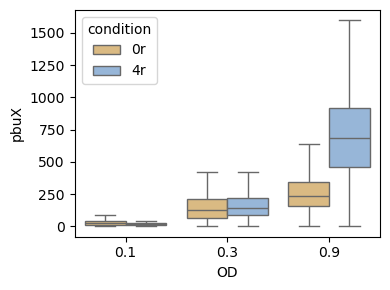

In [66]:
df_plot = pd.DataFrame({
    'OD': adata.obs['OD'],
    'pbuX': adata[:, 'pbuX'].layers['scvi_normalized'].flatten(),  # replace this with your actual column or extraction
    'condition': adata.obs['condition']
})

# Now, plot it
plt.figure(figsize=(4, 3))
sns.boxplot(data=df_plot, x='OD', y='pbuX', hue='condition',
             palette=[ '#E8BE74', "#8CB6E3",],
             showfliers=False,
             width=0.8,
             dodge=True
             )
plt.tight_layout()
plt.savefig("pbuX_boxplot.pdf")
plt.show()

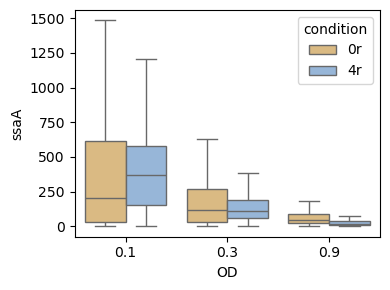

In [67]:
df_plot = pd.DataFrame({
    'OD': adata.obs['OD'],
    'ssaA': adata[:, 'ssaA'].layers['scvi_normalized'].flatten(),  # replace this with your actual column or extraction
    'condition': adata.obs['condition']
})

# Now, plot it
plt.figure(figsize=(4, 3))
sns.boxplot(data=df_plot, x='OD', y='ssaA', hue='condition',
             palette=[ '#E8BE74', "#8CB6E3",],
             showfliers=False,
             width=0.8,
             dodge=True
             )
plt.tight_layout()
plt.savefig("ssaA_boxplot.pdf")
plt.show()

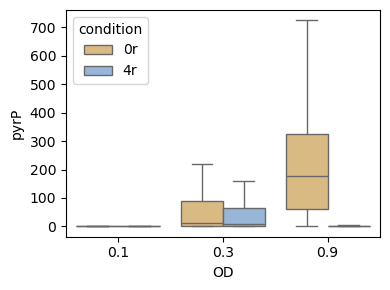

In [87]:
df_plot = pd.DataFrame({
    'OD': adata.obs['OD'],
    'pyrP': adata[:, 'pyrP'].layers['scvi_normalized'].flatten(),  # replace this with your actual column or extraction
    'condition': adata.obs['condition']
})

# Now, plot it
plt.figure(figsize=(4, 3))
sns.boxplot(data=df_plot, x='OD', y='pyrP', hue='condition',
             palette=[ '#E8BE74', "#8CB6E3",],
             showfliers=False,
             width=0.8,
             dodge=True
             )
plt.tight_layout()
plt.savefig("pyrP_boxplot.pdf")
plt.show()

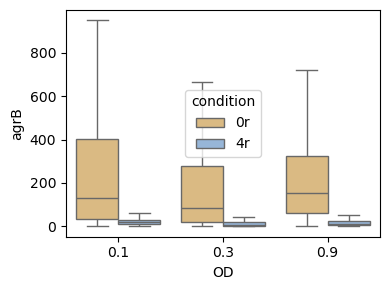

In [130]:
df_plot = pd.DataFrame({
    'OD': adata.obs['OD'],
    'agrB': adata[:, 'agrB'].layers['scvi_normalized'].flatten(),  # replace this with your actual column or extraction
    'condition': adata.obs['condition']
})

# Now, plot it
plt.figure(figsize=(4, 3))
sns.boxplot(data=df_plot, x='OD', y='agrB', hue='condition',
             palette=[ '#E8BE74', "#8CB6E3",],
             showfliers=False,
             width=0.8,
             dodge=True
             )
plt.tight_layout()
plt.savefig("agrB_boxplot.pdf")
plt.show()

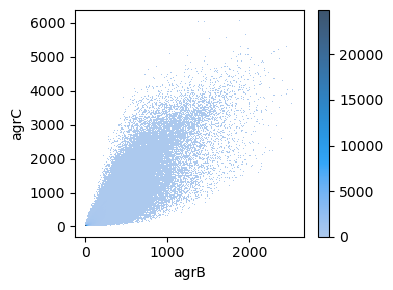

In [12]:
df_plot = pd.DataFrame({
    'OD': adata[adata.obs['condition']=='0r'].obs['OD'],
    'agrB': adata[adata.obs['condition']=='0r'][:, 'agrB'].layers['scvi_normalized'].flatten(),  # replace this with your actual column or extraction
    'agrC': adata[adata.obs['condition']=='0r'][:, 'agrC'].layers['scvi_normalized'].flatten(), 
    'Cluster': adata[adata.obs['condition']=='0r'].obs['Cluster']
})
plt.figure(figsize=(4, 3))
sns.histplot(data=df_plot, x='agrB', y='agrC', bins=200, cbar=True, 
             )
#plt.xlim(-180, 2000)   # Replace with your desired x-axis limits
#plt.ylim(-50, 600)
plt.tight_layout()
plt.savefig("0r_agrB_agrC_scatter_displot.pdf")

In [32]:
df_plot = pd.DataFrame({
    'OD': adata.obs['OD'],
    'agrB': adata[:, 'agrB'].layers['scvi_normalized'].flatten(),  # replace this with your actual column or extraction
    'groES': adata[:, 'groES'].layers['scvi_normalized'].flatten(), 
    'pbuX': adata[:, 'pbuX'].layers['scvi_normalized'].flatten(),
    'Cluster': adata.obs['Cluster'],
    'condition': adata.obs['condition']
})

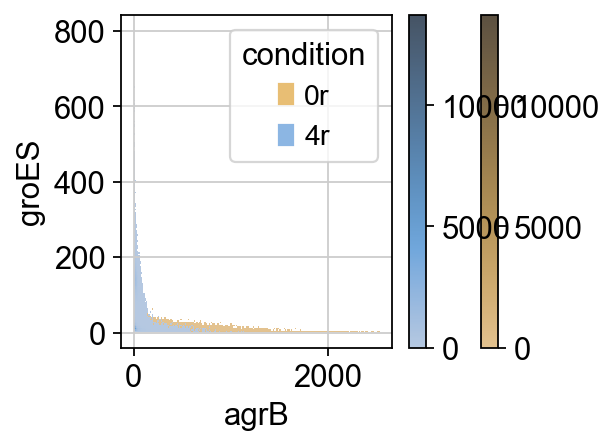

In [35]:
plt.figure(figsize=(4, 3))
sns.histplot(data=df_plot, x='agrB', y='groES', bins=200, cbar=True, 
             hue='condition',
             palette=[ '#E8BE74',"#8CB6E3"]
             )
#plt.xlim(-180, 2000)   # Replace with your desired x-axis limits
#plt.ylim(-50, 600)
plt.tight_layout()
plt.savefig("agrB_groES_scatter_displot.pdf")

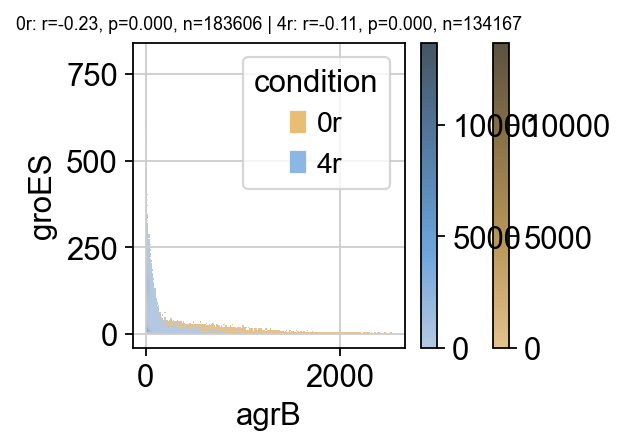

In [38]:
from scipy.stats import pearsonr, spearmanr
stats = []
for cond, g in df_plot[['agrB','groES','condition']].dropna().groupby('condition'):
    r, p = pearsonr(g['agrB'], g['groES'])  # or pearsonr(...)
    stats.append(f"{cond}: r={r:.2f}, p={p:.3f}, n={len(g)}")

title = " | ".join(stats)

plt.figure(figsize=(4, 3))
sns.histplot(
    data=df_plot, x='agrB', y='groES', bins=200, cbar=True,
    hue='condition', palette=['#E8BE74', "#8CB6E3"]
)

plt.title(title, fontsize=8)  # smaller font since it can get long
plt.tight_layout()
plt.savefig("agrB_groES_scatter_displot.pdf")

## Differentialy expresses genes

In [18]:
de_df = model.differential_expression(
    groupby="sample"
)
de_df

DE...: 100%|██████████| 6/6 [02:18<00:00, 23.05s/it]


proba_de  proba_not_de  bayes_factor    scale1    scale2  \
deoD1               0.9850        0.0150      4.184591  0.000821  0.000031   
ssuB                0.9818        0.0182      3.987965  0.000013  0.000232   
prsA                0.9814        0.0186      3.965818  0.000041  0.000272   
mntC                0.9814        0.0186      3.965818  0.000032  0.000464   
mntA                0.9806        0.0194      3.922891  0.000017  0.000254   
...                    ...           ...           ...       ...       ...   
sdrC                0.5766        0.4234      0.308831  0.000038  0.000036   
SAUSA300_RS03020    0.5652        0.4348      0.262293  0.000105  0.000110   
SAUSA300_RS04945    0.5558        0.4442      0.224134  0.000111  0.000099   
sstA                0.5348        0.4652      0.139425  0.000038  0.000035   
SAUSA300_RS06415    0.5124        0.4876      0.049610  0.000132  0.000145   

                  pseudocounts  delta  lfc_mean  lfc_median   lfc_std  ...  \
deoD1                      0.0   0.25  4.453677    4.651207  2.624227  ...   
ssuB                       0.0   0.25 -3.925300   -3.919269  2.225393  ...   
prsA                       0.0   0.25 -3.077952   -3.230654  1.599500  ...   
mntC                       0.0   0.25 -3.540933   -3.478693  2.054403  ...   
mntA                       0.0   0.25 -3.592757   -3.511929  2.082987  ...   
...                        ...    ...       ...         ...       ...  ...   
sdrC                       0.0   0.25  0.106442    0.066377  0.484173  ...   
SAUSA300_RS03020           0.0   0.25 -0.052481   -0.081127  0.437705  ...   
SAUSA300_RS04945           0.0   0.25  0.176135    0.157882  0.404414  ...   
sstA                       0.0   0.25  0.144955    0.142139  0.415455  ...   
SAUSA300_RS06415           0.0   0.25 -0.092811   -0.068904  0.394553  ...   

                  raw_mean1  raw_mean2  non_zeros_proportion1  \
deoD1              0.020292   0.000720               0.019488   
ssuB               0.000174   0.014631               0.000174   
prsA               0.000670   0.016918               0.000670   
mntC               0.000563   0.030603               0.000549   
mntA               0.000348   0.018107               0.000348   
...                     ...        ...                    ...   
sdrC               0.001370   0.001173               0.001370   
SAUSA300_RS03020   0.005669   0.005325               0.005589   
SAUSA300_RS04945   0.006583   0.004776               0.006476   
sstA               0.001397   0.001233               0.001343   
SAUSA300_RS06415   0.007846   0.007710               0.007819   

                  non_zeros_proportion2  raw_normalized_mean1  \
deoD1                          0.000707                   NaN   
ssuB                           0.013915                   NaN   
prsA                           0.016416                   NaN   
mntC                           0.027847                   NaN   
mntA                           0.016996                   NaN   
...                                 ...                   ...   
sdrC                           0.001141              0.225925   
SAUSA300_RS03020               0.005279              0.943593   
SAUSA300_RS04945               0.004723              1.116121   
sstA                           0.001201              0.248578   
SAUSA300_RS06415               0.007567              1.383561   

                  raw_normalized_mean2  is_de_fdr_0.05      comparison  \
deoD1                              NaN            True  0r_0.1 vs Rest   
ssuB                               NaN            True  0r_0.1 vs Rest   
prsA                               NaN            True  0r_0.1 vs Rest   
mntC                               NaN            True  0r_0.1 vs Rest   
mntA                               NaN            True  0r_0.1 vs Rest   
...                                ...             ...             ...   
sdrC                               NaN           False  4r_0.9 v

In [19]:
markers = {}
cats = adata.obs['sample'].cat.categories
for i, c in enumerate(cats):
    cid = "{} vs Rest".format(c)
    cell_type_df = de_df.loc[de_df.comparison == cid]

    cell_type_df = cell_type_df[cell_type_df.lfc_mean > 0]

    cell_type_df = cell_type_df[cell_type_df["bayes_factor"] > 2.5]
    cell_type_df = cell_type_df[cell_type_df["non_zeros_proportion1"] > 0.1]

    markers[c] = cell_type_df.index.tolist()[:10]
    
markers

{'0r_0.1': ['agrC', 'ssaA', 'fruA', 'ldh1', 'ausA', 'tmRNA'],
 '0r_0.3': ['agrC', 'carB', 'glcA'],
 '0r_0.9': ['pyrF',
  'pyrE',
  'carB',
  'pyrB',
  'pyrP',
  'pyrC',
  'carA',
  'spa',
  'agrC',
  'agrB'],
 '4r_0.1': ['hrcA',
  'grpE',
  'mcsA',
  'mcsB',
  'clpB',
  'groES',
  'dnaJ',
  'dnaK',
  'clpC',
  'prmA'],
 '4r_0.3': ['spa', 'carB', 'ssaA', 'glpD', 'pbuX'],
 '4r_0.9': ['spa',
  'guaB',
  'guaA',
  'pbuX',
  'hchA',
  'dtpT',
  'fdhA',
  'atl',
  'qoxB',
  'asp23']}

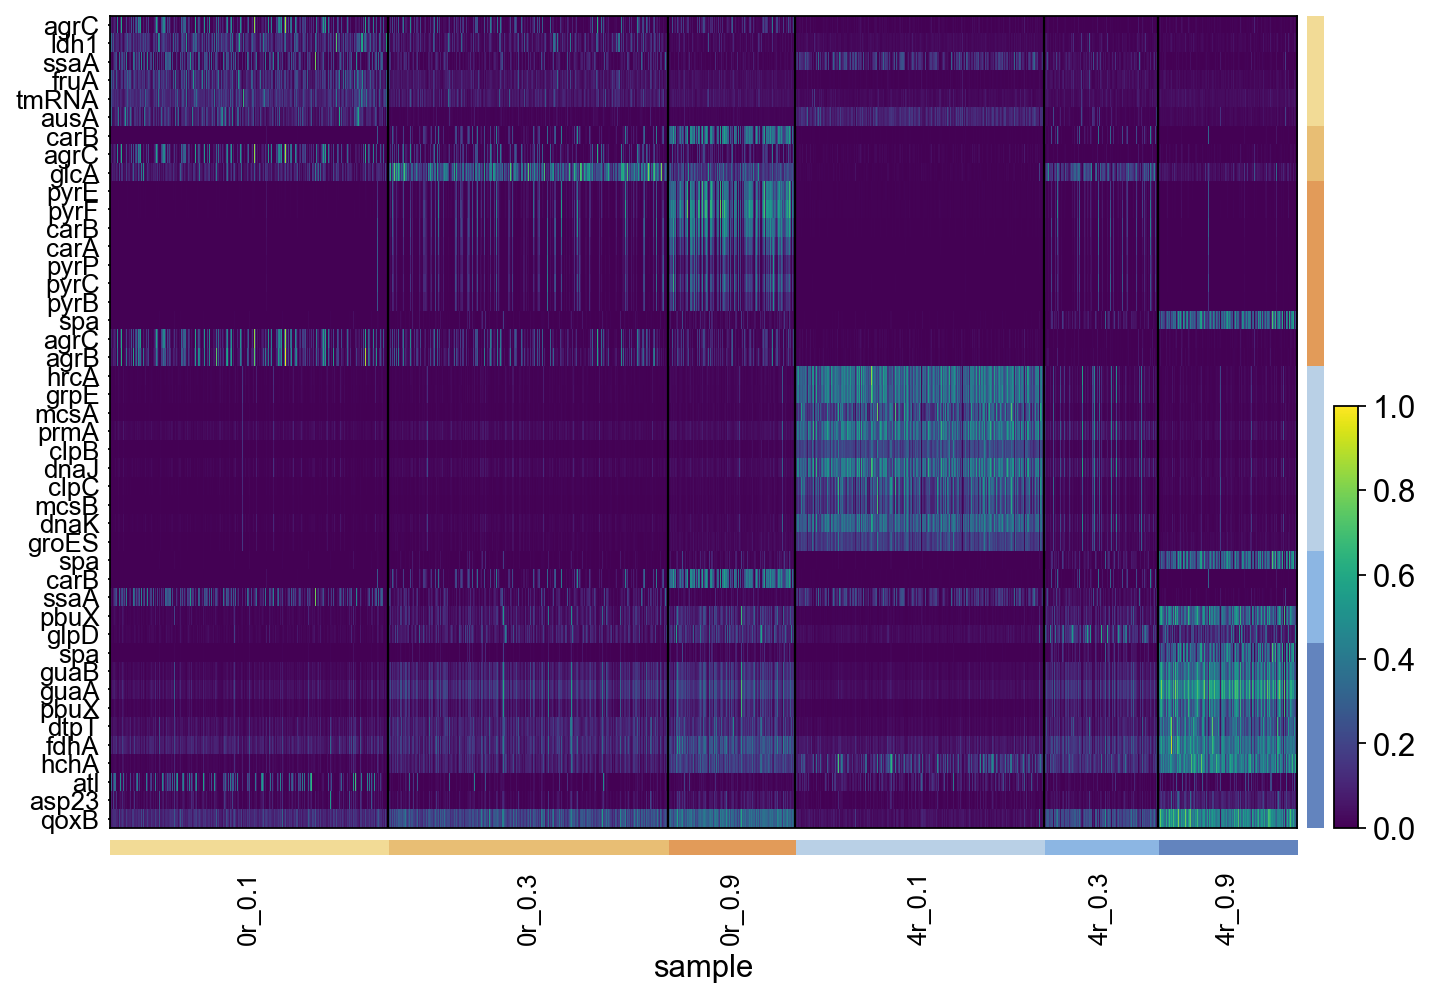

In [ ]:
# Plot the heatmap with the downsampled data
sc.pl.heatmap(
    adata,
    markers,
    groupby='sample',
    layer="scvi_normalized",
    standard_scale="var",
    dendrogram=False,
    figsize=(10, 7),
    swap_axes=True, 
    save="rotate_sample_gene_markers.pdf"
)

In [ ]:
# Determine the minimum number of cells in any cluster
min_cells_per_cluster = 3000

# Downsample each cluster to have the same number of cells
indices_to_keep = []

for cluster in adata.obs['sample'].unique():
    cluster_indices = adata.obs[adata.obs['sample'] == cluster].index
    sampled_indices = np.random.choice(cluster_indices, min_cells_per_cluster, replace=False)
    indices_to_keep.extend(sampled_indices)

# Create a new AnnData object with the downsampled cells
adata_downsampled = adata[indices_to_keep, :].copy()

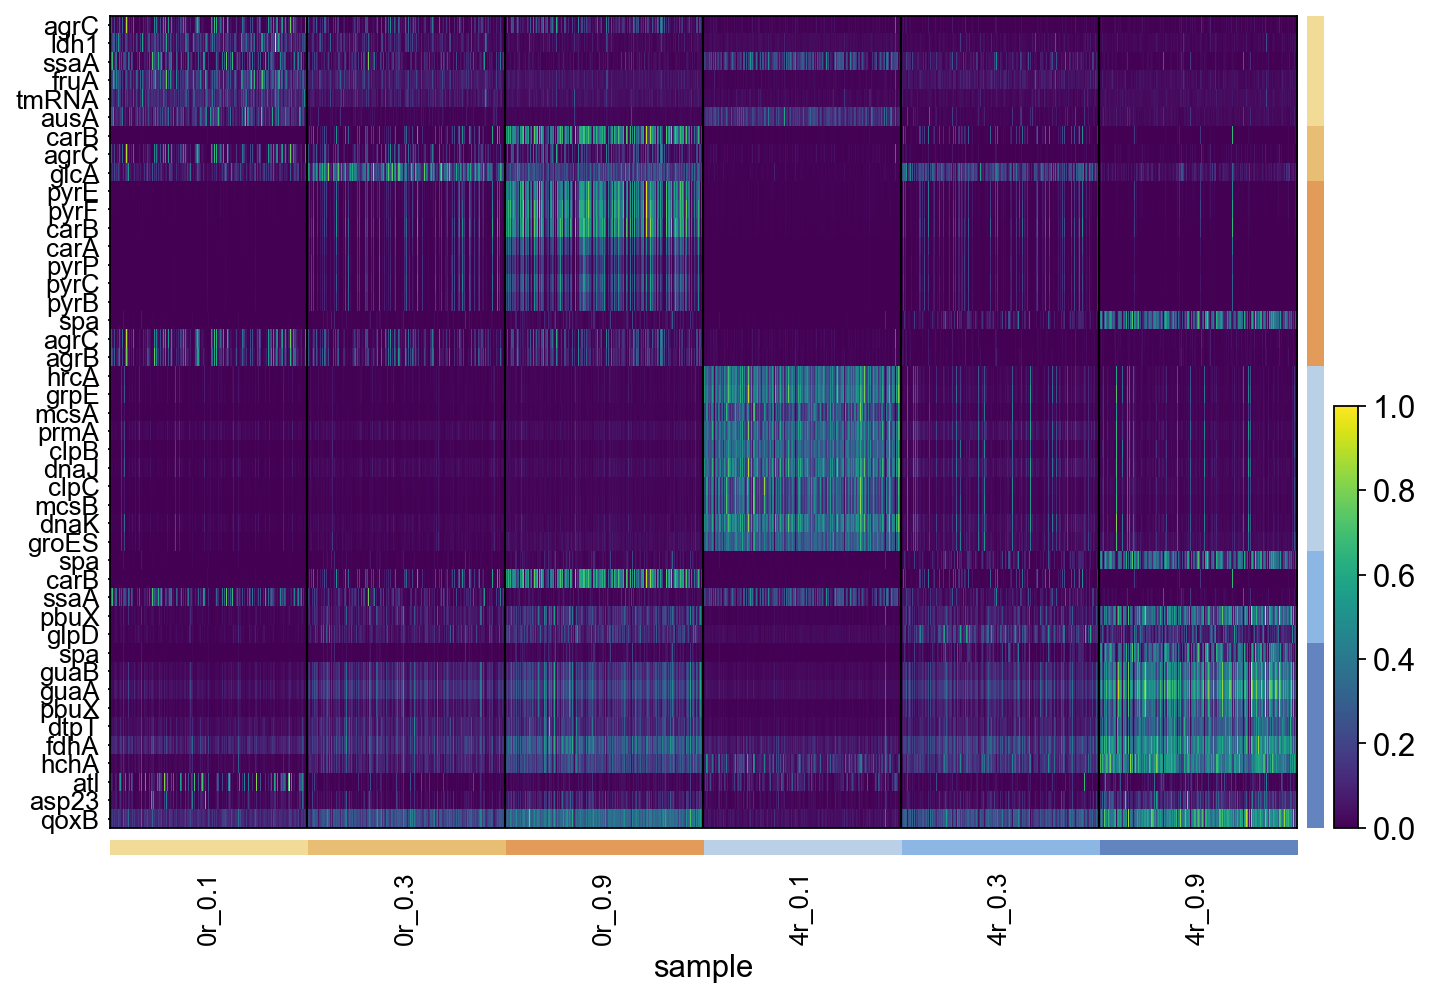

In [ ]:
# Plot the heatmap with the downsampled data
sc.pl.heatmap(
    adata_downsampled,
    markers,
    groupby='sample',
    layer="scvi_normalized",
    standard_scale="var",
    dendrogram=False,
    figsize=(10, 7),
    swap_axes=True, 
    save="rotate_sample_gene_markers_downsampled.pdf"
)

In [10]:
# Determine the minimum number of cells in any cluster
min_cells_per_cluster = 3000

# Downsample each cluster to have the same number of cells
indices_to_keep = []

for cluster in adata.obs['sample'].unique():
    cluster_indices = adata.obs[adata.obs['sample'] == cluster].index
    sampled_indices = np.random.choice(cluster_indices, min_cells_per_cluster, replace=False)
    indices_to_keep.extend(sampled_indices)

# Create a new AnnData object with the downsampled cells
adata_downsampled = adata[indices_to_keep, :].copy()

In [11]:
adata_downsampled.obs['sample_cluster'] = (adata_downsampled.obs['sample'].astype(str) + "_" + adata_downsampled.obs['Cluster'].astype(str)).astype("category")
my_order=['0r_0.1_S', '0r_0.1_L', '0r_0.1_M',
          '0r_0.3_S', '0r_0.3_L', '0r_0.3_M',
          '0r_0.9_S', '0r_0.9_L', '0r_0.9_M',
          '4r_0.1_S', '4r_0.1_L', '4r_0.1_M',
          '4r_0.3_S', '4r_0.3_L', '4r_0.3_M',
          '4r_0.9_S', '4r_0.9_L', '4r_0.9_M']
# Keep only those that exist
cats = adata_downsampled.obs["sample_cluster"].cat.categories
my_order = [c for c in my_order if c in cats]
adata_downsampled.obs["sample_cluster"] = (adata_downsampled.obs["sample_cluster"].cat.reorder_categories(my_order, ordered=True))
adata_downsampled.obs['sample_cluster'].value_counts()

4r_0.1_S    2976
0r_0.9_L    2823
0r_0.1_S    2792
4r_0.9_M    2620
4r_0.3_L    2529
0r_0.3_L    2483
0r_0.3_S     485
4r_0.3_S     418
4r_0.9_L     305
0r_0.1_L     204
0r_0.9_M     126
4r_0.9_S      75
4r_0.3_M      53
0r_0.9_S      51
0r_0.3_M      32
4r_0.1_L      24
0r_0.1_M       4
Name: sample_cluster, dtype: int64

In [12]:
#get the cell order of the heatmap
# Make a working copy of the grouping series
group = "sample_cluster"
s = adata_downsampled.obs[group]

# Ensure categorical so we can control/inspect category order
if not pd.api.types.is_categorical_dtype(s):
    s = s.astype("category")

# This is the order the heatmap will use for groups
group_order = list(s.cat.categories)

# Build a DataFrame that preserves original cell order within each group
tmp = adata_downsampled.obs.copy()
tmp["_group"] = s

# Stable sort by group so within-group order stays as in adata
tmp["_group"] = tmp["_group"].cat.reorder_categories(group_order, ordered=True)
ordered_cell_ids = tmp.sort_values("_group", kind="stable").index.tolist()

ordered_cell_ids[:10], len(ordered_cell_ids)

(['BS29199A_bc1_22_bc2_17_bc3_53-adata1',
  'BS29201A_bc1_5_bc2_35_bc3_47-adata1',
  'BS29199A_bc1_24_bc2_47_bc3_8-adata1',
  'BS29198A_bc1_10_bc2_85_bc3_17-adata1',
  'BS29201A_bc1_8_bc2_60_bc3_3-adata1',
  'BS29204A_bc1_7_bc2_95_bc3_90-adata1',
  'BS29200A_bc1_6_bc2_64_bc3_19-adata1',
  'BS29201A_bc1_21_bc2_35_bc3_3-adata1',
  'BS29201A_bc1_18_bc2_11_bc3_32-adata1',
  'BS29202A_bc1_23_bc2_56_bc3_46-adata1'],
 18000)

In [8]:
adata_downsampled = adata[ordered_cell_ids, :]
adata_downsampled.obs['sample_cluster'] = (adata_downsampled.obs['sample'].astype(str) + "_" + adata_downsampled.obs['Cluster'].astype(str)).astype("category")
my_order=['0r_0.1_S', '0r_0.1_L', '0r_0.1_M',
          '0r_0.3_S', '0r_0.3_L', '0r_0.3_M',
          '0r_0.9_S', '0r_0.9_L', '0r_0.9_M',
          '4r_0.1_S', '4r_0.1_L', '4r_0.1_M',
          '4r_0.3_S', '4r_0.3_L', '4r_0.3_M',
          '4r_0.9_S', '4r_0.9_L', '4r_0.9_M']
# Keep only those that exist
cats = adata_downsampled.obs["sample_cluster"].cat.categories
my_order = [c for c in my_order if c in cats]
adata_downsampled.obs["sample_cluster"] = (adata_downsampled.obs["sample_cluster"].cat.reorder_categories(my_order, ordered=True))
adata_downsampled.obs['sample_cluster'].value_counts()
adata_downsampled

/var/folders/51/n69nfv650kj287fzxg37b8r80000gn/T/ipykernel_69023/2931141328.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_downsampled.obs['sample_cluster'] = (adata_downsampled.obs['sample'].astype(str) + "_" + adata_downsampled.obs['Cluster'].astype(str)).astype("category")


AnnData object with n_obs × n_vars = 18000 × 2284
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'sample', 'n_counts', '_scvi_batch', '_scvi_labels', 'leiden_scVI', '_scvi_raw_norm_scaling', 'OD', 'cluster', 'batch', 'condition', 'Cluster', 'sample_cluster'
    var: 'n_cells_by_counts-adata1', 'mean_counts-adata1', 'log1p_mean_counts-adata1', 'pct_dropout_by_counts-adata1', 'total_counts-adata1', 'log1p_total_counts-adata1', 'n_counts-adata1', 'n_cells_by_counts-adata1-adata2', 'mean_counts-adata1-adata2', 'log1p_mean_counts-adata1-adata2', 'pct_dropout_by_counts-adata1-adata2', 'total_counts-adata1-adata2', 'log1p_total_counts-adata1-adata2', 'n_counts-adata1-adata2', 'n_cells_by_counts-adata2-adata2', 'mean_counts-adata2-adata2', 'log1p_mean_counts-adata2-adata2', 'pct_dropout_by_counts-adata2-adata2', 'total_counts

/var/folders/51/n69nfv650kj287fzxg37b8r80000gn/T/ipykernel_25982/196564045.py:46: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


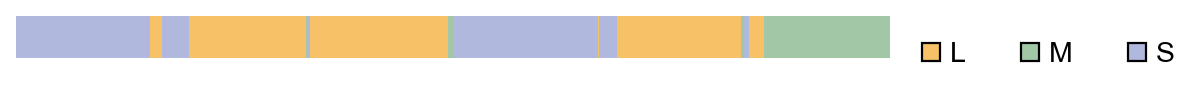

In [73]:
from matplotlib.colors import ListedColormap

key = "Cluster"

# Get clusters in the exact order of your heatmap cells
clusters = adata_downsampled[ordered_cell_ids].obs[key].copy()

# Ensure categorical for stable ordering
if not pd.api.types.is_categorical_dtype(clusters):
    clusters = clusters.astype("category")

cats = list(clusters.cat.categories)

# Try to reuse Scanpy's stored colors if available
uns_key = f"{key}_colors"
if uns_key in adata_downsampled.uns and len(adata_downsampled.uns[uns_key]) >= len(cats):
    colors = adata_downsampled.uns[uns_key][:len(cats)]
else:
    # Fallback palette (matplotlib default cycle expanded)
    import matplotlib as mpl
    base = mpl.rcParams['axes.prop_cycle'].by_key()['color']
    # Repeat if needed
    colors = (base * ((len(cats) // len(base)) + 1))[:len(cats)]

cluster_to_color = dict(zip(cats, colors))

# Convert categories to integer codes for imshow
codes = clusters.cat.codes.to_numpy()
bar_mat = codes.reshape(1, -1)

cmap = ListedColormap([cluster_to_color[c] for c in cats])

# Plot the annotation bar
fig, ax = plt.subplots(figsize=(7, 0.35))
ax.imshow(bar_mat, aspect="auto", cmap=cmap, interpolation="nearest")
ax.set_axis_off()

# Optional: add a compact legend
handles = [
    plt.Line2D([0], [0], marker='s', color='none',
               markerfacecolor=cluster_to_color[c], markersize=8, label=c)
    for c in cats
]
ax.legend(handles=handles, ncol=min(len(cats), 6),
          bbox_to_anchor=(1.01, 1), loc="upper left", frameon=False)
plt.tight_layout()
plt.savefig("Cluster_annotation_bar_final.svg")
plt.show()

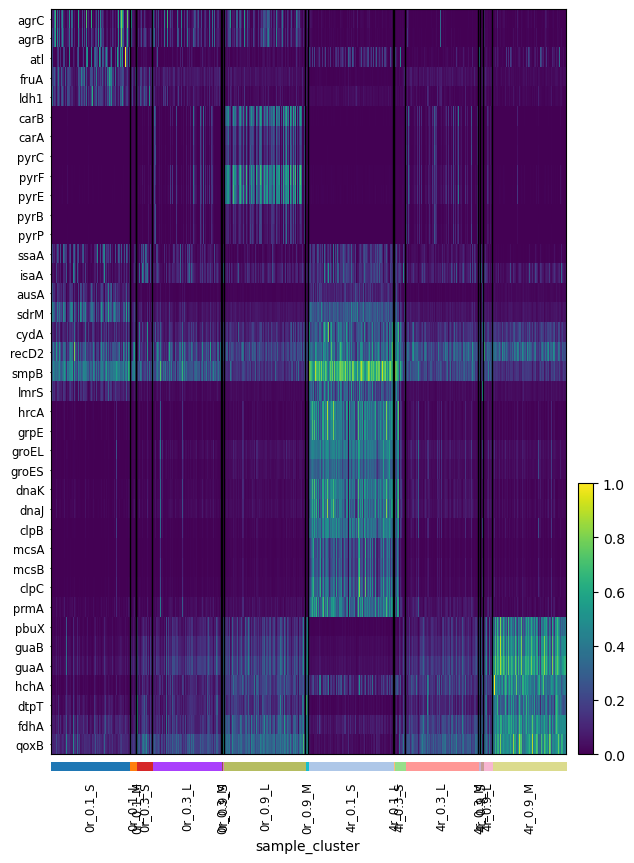

In [9]:
# Plot the heatmap with the downsampled data
markers = ['agrC', 'agrB', 'atl','fruA','ldh1',
           'carB','carA','pyrC','pyrF','pyrE','pyrB','pyrP',
           'ssaA','isaA','ausA','sdrM','cydA','recD2','smpB','lmrS',
           'hrcA','grpE','groEL','groES','dnaK','dnaJ','clpB','mcsA','mcsB','clpC','prmA',
           'pbuX','guaB','guaA','hchA','dtpT','fdhA','qoxB']
sc.pl.heatmap(
    adata_downsampled,
    markers,
    groupby='sample_cluster',
    layer="scvi_normalized",
    standard_scale="var",
    dendrogram=False,
    figsize=(7, 10),
    swap_axes=True, 
    save="rotate_sample_cluster_gene_markers_downsampled_vertical_final_smpB.svg"
)

deseq2

In [42]:
X = adata.raw.X                  # raw counts matrix
genes = adata.raw.var_names      # genes in raw
samples = adata.obs['sample'].astype(str).to_numpy()
uniq = pd.unique(samples)

rows = []
for s in uniq:
    mask = samples == s
    Xs = X[mask]
    rows.append(np.asarray(Xs.sum(axis=0)).ravel())

sum_df = pd.DataFrame(rows, index=uniq, columns=genes) 
sum_df

dnaA    dnaN  SAUSA300_RS00020    recF    gyrB    gyrA    nnrD  \
0r_0.1   600.0   439.0             137.0  1056.0  1890.0  1483.0  1028.0   
0r_0.3  1514.0  1529.0             121.0  1176.0  4566.0  5210.0   271.0   
0r_0.9  1504.0  1945.0             100.0  1065.0  3305.0  4261.0   129.0   
4r_0.1  1078.0  1096.0             119.0  1288.0  2699.0  2731.0  3963.0   
4r_0.3  1141.0  1372.0              69.0  1122.0  3295.0  4173.0   208.0   
4r_0.9  1668.0  1801.0             121.0  1404.0  3676.0  3610.0   104.0   

         hutH    serS  SAUSA300_RS00055  ...    tmRNA  SAUSA300_RS15260  \
0r_0.1   58.0   435.0              18.0  ...  15262.0              93.0   
0r_0.3   52.0  1190.0              29.0  ...  13828.0             146.0   
0r_0.9   40.0  1072.0              82.0  ...   8052.0              78.0   
4r_0.1  207.0   665.0              79.0  ...   9194.0              73.0   
4r_0.3   48.0   708.0              50.0  ...   5844.0              52.0   
4r_0.9   18.0   968.0             145.0  ...   5521.0              18.0   

        SAUSA300_RS15340  SAUSA300_RS15370   epiG  SAUSA300_RS15490  \
0r_0.1            7077.0            2093.0   60.0              64.0   
0r_0.3           11120.0             904.0   36.0              89.0   
0r_0.9            8597.0            1899.0   48.0              84.0   
4r_0.1            7544.0            2397.0  277.0              41.0   
4r_0.3            5274.0             378.0   46.0              34.0   
4r_0.9            4877.0            1493.0   55.0              25.0   

        SAUSA300_RS15635  SAUSA300_RS15735  SAUSA300_RS15740  SAUSA300_RS15795  
0r_0.1              39.0              23.0              16.0              28.0  
0r_0.3              21.0              93.0              65.0              30.0  
0r_0.9              15.0             352.0             254.0              33.0  
4r_0.1             238.0              19.0              14.0              45.0  
4r_0.3              29.0               2.0               7.0              25.0  
4r_0.9              11.0               3.0               0.0              17.0  

[6 rows x 2284 columns]

In [43]:
sum_df.to_csv("sample_0r4r139_sum_counts_raw.csv")